# Mini Project 1: Autonomous Vehicle Safety Analysis

$
\textbf{Group members (all registered):}\\ \ \\
\text{Boyang Zhou (NetID: boyangz3)}\\
\text{Chuhao Feng (NetID: chuhaof2)}\\
\text{Mengxuan Yu (NetID: my13)}\\ 
$

## Initialization

In [1]:
# import necessary package
import pandas as pd 
import seaborn as sns
import numpy as np  
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st

In [2]:
# adjust format
sns.set()

## Task 0

### Question 1

In [3]:
#import mp1_av_disengagements.csv as dseng
dseng = pd.read_csv('mp1_av_disengagements.csv')

#import mp1_av_totalmiles.csv as tmile
tmile = pd.read_csv('mp1_av_totalmiles.csv')

In [4]:
# inspect dseng dataframe
dseng

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions
5,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.88,Incorrect Traffic Light Detection
6,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.41,Emergency Vehicle
7,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.45,Emergency Vehicle
8,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.07,Software Froze
9,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.37,Hardware Fault


In [5]:
# inspect tmile dataframe
tmile

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30
5,15-Feb,WDD2221851A001072,18745,16,8,8
6,15-Mar,WDD2221851A001072,22204,39,31,8
7,15-Apr,WDD2221851A001072,31927,72,51,21
8,15-May,WDD2221851A001072,38017,34,11,23
9,15-Jun,WDD2221851A001072,42047,127,58,69


### Question 2
#### a.

In [6]:
# Calculate total number of AV disengagements over the entire duration of available data
n_total_disengagement = len(dseng)
print('Total number of AV disengagements is %i.'%n_total_disengagement)

Total number of AV disengagements is 1024.


#### b.

In [7]:
# Calculate number of unique months that have recorded AV disengagements
uniq_month_dseng = dseng['Month'].unique()
uniq_month_tmile = tmile['Month'].unique()
print(uniq_month_dseng)
print(uniq_month_tmile)

n_uniq_month = len(uniq_month_dseng)
print('Number of unique months is %i.' %n_uniq_month)

['14-Sep' '14-Oct' '14-Nov' '14-Dec' '15-Jan' '15-Feb' '15-Mar' '15-Apr'
 '15-May' '15-Jun' '15-Jul' '15-Aug' '15-Sep' '15-Oct' '15-Nov']
['14-Sep' '14-Oct' '14-Nov' '14-Dec' '15-Jan' '15-Feb' '15-Mar' '15-Apr'
 '15-May' '15-Jun' '15-Jul' '15-Aug' '15-Sep' '15-Oct' '15-Nov']
Number of unique months is 15.


#### c.

In [8]:
# Derive list of unique locations of AV disengagements
location = dseng['Location'].unique()
print(location)

['urban-street' 'highway']


#### d.

In [9]:
# Calculate number of unique causes for AV disengagements
uniq_cause = dseng['Cause'].unique()
n_uniq_cause = len(uniq_cause)
print('Number of unique causes is %i.' %n_uniq_cause)

Number of unique causes is 10.


#### e.

In [10]:
# Find columns with missing values
print(dseng.isnull().any())
print("Column 'ReactionTime' in 'mp1_av_disengagements.csv' has missing value.")
print('\n')
print(tmile.isnull().any())
print("No column in 'mp1_av_totalmiles.csv' has missing value.")
print('\n')
print("Number of missing values in column 'ReactionTime' is %i." %dseng['ReactionTime'].isnull().sum())

Month            False
Car              False
Location         False
Weather          False
TypeOfTrigger    False
ReactionTime      True
Cause            False
dtype: bool
Column 'ReactionTime' in 'mp1_av_disengagements.csv' has missing value.


Month                                 False
Car                                   False
miles driven in autonomous mode       False
total number of disengagements        False
number of automatic disengagements    False
number of manual disengagements       False
dtype: bool
No column in 'mp1_av_totalmiles.csv' has missing value.


Number of missing values in column 'ReactionTime' is 532.


### Question 3

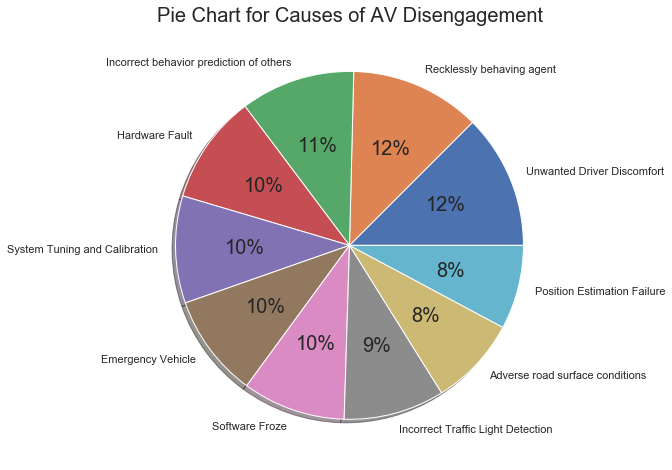

Based on the pie chart, the top two causes are Recklessly behaving agent and Unwanted Driver Discomfort.


In [11]:
# Plot a pie chart for the causes of AV disengagement
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['font.size'] = 20.0

# Get a dictionary formatted in [cause: repeated times]
causes = dseng['Cause'].value_counts()

# Draw the pie chart 
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.0f%%', shadow=True)

# plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="center")
# plt.axis('equal',fontsize=40)

plt.title("Pie Chart for Causes of AV Disengagement", fontsize = 20)
plt.savefig("Pie Chart for Causes of AV Disengagement.svg")
plt.show()

print("Based on the pie chart, the top two causes are Recklessly behaving agent and Unwanted Driver Discomfort.")

### Question 4

The trend is decreasing. AVs are maturing ove time, because disengagement per mile decreases generally as time goes by.


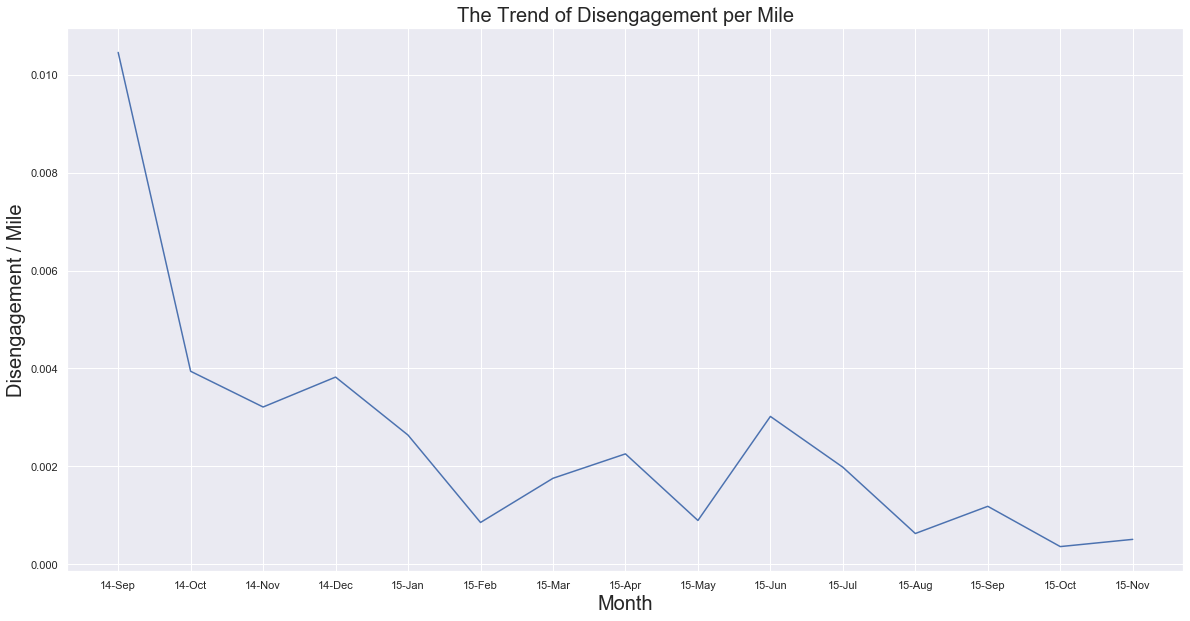

In [12]:
disen_per_mile_draft=tmile.groupby('Month')['total number of disengagements'].sum()/tmile.groupby('Month')['miles driven in autonomous mode'].sum()
mon=tmile['Month'].unique()

disen_per_mile = [disen_per_mile_draft[i] for i in mon]

plt.figure(figsize=(20,10))
plt.plot(mon,disen_per_mile)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Disengagement / Mile',fontsize=20)
plt.title('The Trend of Disengagement per Mile',fontsize=20)
plt.savefig("The Trend of Disengagement per Mile.svg")

print("The trend is decreasing. AVs are maturing ove time, because disengagement per mile decreases generally as time goes by.")

## Task 1

### Question 1

#### a. Gaussian distribution

Gaussian distribution tells us that data near the mean occurs more frequently than data far from the mean.

#### b. Exponential distribution

Exponential distribution tells us that the probability for sample to occur decreases exponentially as time goes by, often used to model the time elapsed between events. 

#### c. Weibull distribution

Weibull distribution is often used to model lifetime of components or time to failure, telling us how the probability for failure behaves as time goes by.

### Question 2

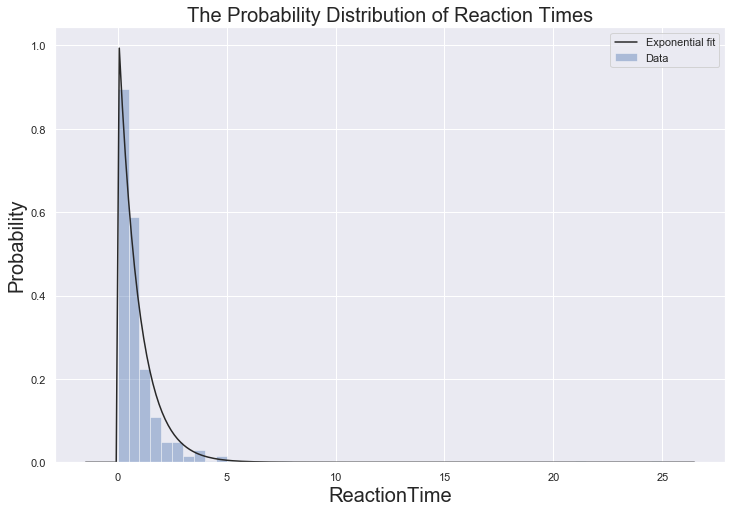

In [13]:
# Plot the probability distribution of reaction times
ax = sns.distplot(dseng['ReactionTime'].dropna(), kde=False, fit=st.expon)#,bins=10)
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('ReactionTime', fontsize=20)
plt.title("The Probability Distribution of Reaction Times", fontsize=20)
plt.legend(['Exponential fit', 'Data'])
plt.savefig("The Probability Distribution of Reaction Times.svg")
plt.show()

This distribution fits exponential distribution. The fit distribution signifies that the probability of reaction time decreases exponentially as reaction time goes up. In other words, human driver tends to react immediately.

### Question 3

#### a.

In [14]:
# Compute the average reaction time for the entire duration of the dataset
avg_react_time_entire = dseng['ReactionTime'].dropna().mean()
print("The average reaction time for the entire duration of the dataset is %f." %avg_react_time_entire)

The average reaction time for the entire duration of the dataset is 0.929770.


#### b.

In [15]:
# Compute the average reaction time for the entire duration of the dataset differentiated by the location of disengagement
print("The average reaction time for the entire duration of the \ndataset differentiated by the location of disengagement:\n")
avg_react_time_location = dseng.dropna().groupby('Location')['ReactionTime'].mean()
print(avg_react_time_location)

The average reaction time for the entire duration of the 
dataset differentiated by the location of disengagement:

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64


### Question 4

In [16]:
# Single Sample Hypothesis Z-test

# Step 1: establish null and alternative hypothesis
# Null hypothesis: The mean reaction time for humans in AV cars is the same as that in non-AV cars, i.e. 𝜇=1.09
# Alternate hypothesis: The mean reaction time for humans in AV cars is different from that in non-AV cars, i.e. 𝜇≠1.09.

# Step 2: Z test
mu = 0.929770 # calculated mean reaction time for humans in AV cars from dataset
mu_0 = 1.09 # provided mean reaction time for humans in non-AV cars
sigma = dseng['ReactionTime'].dropna().std() # calculated standard deviation of reaction time for humans in AV cars from dataset
n = len(dseng['ReactionTime'].dropna()) # sample size

alpha = 0.05 # significance level

z = (mu - mu_0)/(sigma/(n)**(1/2)) # calculate test statistic
print("Statistic Value =", z)

# make decision
if z < -1.645 or z > 1.645:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Statistic Value = -2.098607967964133
Reject null hypothesis


### Question 5

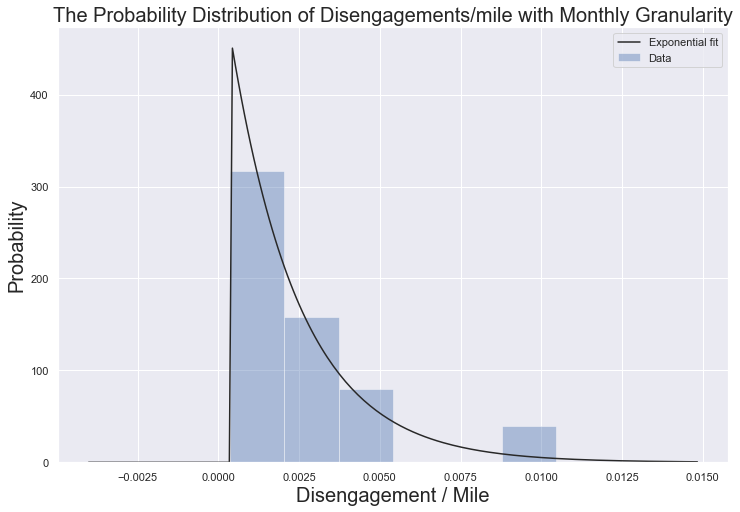

In [17]:
# Plot the probability distribution of disengagements/mile with monthly granularity
ax = sns.distplot(disen_per_mile, kde=False, fit=st.expon)#,bins=10)
ax.set_ylabel('Probability', fontsize=20)
ax.set_xlabel('Disengagement / Mile', fontsize=20)
plt.title("The Probability Distribution of Disengagements/mile with Monthly Granularity", fontsize=20)
plt.legend(['Exponential fit', 'Data'])
plt.savefig("The Probability Distribution of Disengagements_mile with Monthly Granularity.svg")
plt.show()

This distribution fits exponential distribution. The distribution tells us that AVs perform relatively good, and disengagement/mile has higher probability to occur when it is smaller. Besides, high disengagement/mile seems impossible to happen, because probability for higher disengagement/mile decreases exponentially, which is good.

## Task 2

### Question 1

#### a.

Bernoulli distribution

#### b.

In [18]:
print("total miles driving: ",tmile['miles driven in autonomous mode'].sum())
print( dseng.groupby('Weather').size())
print("p(D|C)=",835/(505229*0.28))

total miles driving:  505229
Weather
clear     189
cloudy    835
dtype: int64
p(D|C)= 0.005902556775527249


#### c.

In [19]:
print("p(D|C')=",189/(505229*0.72))

p(D|C')= 0.0005195663748517998


#### d.

In [20]:
print( dseng.groupby(['Weather','TypeOfTrigger']).size())
print("p(D|A,C)=",397/(505229*0.28))
print("p(D|A,C')=",96/(505229*0.72))

Weather  TypeOfTrigger
clear    automatic         96
         manual            93
cloudy   automatic        397
         manual           438
dtype: int64
p(D|A,C)= 0.0028063653172267283
p(D|A,C')= 0.00026390673008345393


#### e.

In [21]:
su=0
for i in range(150,12001):
    su+=np.e**(-0.0059*12000)*(0.0059*12000)**150/np.math.factorial(150)

print('p(λ=0.0059*12000) (k>=150)=',su)

p(λ=0.0059*12000) (k>=150)= 1.1852253231671502e-12


### Question 2

Please refer to the slide.

### Question 3

In [22]:
print("H0: p(D|C)-p(D|C')<=0\nH0: p(D|C)-p(D|C')>0\nα = 0.05 so Z<-1.645")
p1=0.005902556775527249
p2=0.0005195663748517998
p=1024/505229
#print((p1-p2),(p*(1-p)*(1/505229/0.28+1/505229/0.72))**0.5)
print("p(D|C)hat=",p1)
print("p(D|C')hat=",p2)
print("p hat=",p)
print("Z=",(0-(p1-p2))/(p*(1-p)*(1/(505229*0.28)+1/(505229*0.72)))**0.5)
print("Z=",-38.1986243877602,"<1.645\nReject at α=0.05")

H0: p(D|C)-p(D|C')<=0
H0: p(D|C)-p(D|C')>0
α = 0.05 so Z<-1.645
p(D|C)hat= 0.005902556775527249
p(D|C')hat= 0.0005195663748517998
p hat= 0.002026803687040926
Z= -38.1986243877602
Z= -38.1986243877602 <1.645
Reject at α=0.05


### Question 4

In [23]:
data=dseng.dropna()

In [24]:
G6_AD_clo=len(dseng.loc[(dseng['TypeOfTrigger']=="automatic")&(dseng['Weather']=="cloudy")&(dseng['ReactionTime']>0.6)])# the number of automatic disengagements with reaction time greater than 0.6 on cloudy day 
AD_clo=len(dseng.loc[(dseng['TypeOfTrigger']=="automatic")&(dseng['Weather']=="cloudy")])      # the number of automatic disengagements on cloudy day
G9_AD_ear=len(dseng.loc[(dseng['TypeOfTrigger']=="automatic")&(dseng['Weather']=="clear")&(dseng['ReactionTime']>0.9)]) #the number of automatic disengagements with reaction time greater than 0.9 on clear d
AD_ear=len(dseng.loc[(dseng['TypeOfTrigger']=="automatic")&(dseng['Weather']=="clear")])        # the number of automatic disengagements on clear day
condit_p_cloudy=G6_AD_clo/AD_clo#conditional probability of reaction time greater than 0.6s in cloudy day
condit_p_clear=G9_AD_ear/AD_ear#conditional probability of reaction time greater than 0.9s in clear day

In [25]:
print('conditional probability of reaction time greater than 0.6s in cloudy day',condit_p_cloudy)
print('conditional probability of reaction time greater than 0.9s in clear day',condit_p_clear)

conditional probability of reaction time greater than 0.6s in cloudy day 0.473551637279597
conditional probability of reaction time greater than 0.9s in clear day 0.28125


### Question 5

$
\text{P(A)=P(Accident,Auto,Cloudy)+ P(Accident,Auto,Clear)}\\
\ \ \ \ \text{=(P(Accidnet|Auto,Cloudy)* P(auto,cloudy)+P(Accident|Auto,Clear)* P(auto,clear)}\\
\ \ \ \ \text{=(P(Accidnet|Auto,Cloudy)* (number(auto disengagement,cloudy)/total cloudy miles)}\\
\ \ \ \ \ \ \ \text{+P(Accident|Auto,Clear)*  (number(auto disengagement,clear)/total clear miles)}
$

In [26]:
total_mile=np.array(tmile['miles driven in autonomous mode']).sum()
p_acci_g_au_clo=(len(data.loc[(data['ReactionTime']>0.6)&(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='cloudy')]))/len(data.loc[(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='cloudy')])#prob of accident given auto and cloudy
p_acci_g_au_ear=(len(data.loc[(data['ReactionTime']>0.9)&(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='clear')]))/len(data.loc[(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='clear')])#prob of accident given auto and clear
p_auto_g_clo=(len(data.loc[(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='cloudy')]))/len(data.loc[(data['Weather']=='cloudy')])#prob of auto given cloudy
p_auto_g_ear=(len(data.loc[(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='clear')]))/len(data.loc[(data['Weather']=='clear')])#prob of auto given clear
p_clo=(1-0.72)#prob of cloudy
p_ear=0.72#prob of clear

frac_clo_miles=len(data.loc[(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='cloudy')])/(total_mile*p_clo)
frac_ear_miles=len(data.loc[(data['TypeOfTrigger']=='automatic')
                                               &(data['Weather']=='clear')])/(total_mile*p_ear)

p_accident=p_acci_g_au_clo*frac_clo_miles+p_acci_g_au_ear*frac_ear_miles

print('the probabiity of an accident per mile',p_accident)

the probabiity of an accident per mile 0.0014031826586133641


### Question 6

The probability of an accident happens of AV is 0.0014031826586133641 which is much greater than the human driver accident probability 2e-6. 
This result shows that when AV disengagement happens automaticly it has a very high probability to result in an accident and the AV is not safe for the passengers. This reminds us that we should reduce the chance that an automatic disengagement happens in our development of AV system. Because once it happens, it has a great probability to cause an accident. And it also remind us to design a better system (such as an automatic disengagement  prediction system) which can reduce the reaction time for the drive to take action to the automatic disengagement. 

### Question 7

In [27]:
# Null hypothesis: Samples of disengagement reaction time in cloudy days and samples of disengagement reaction time in clear 
# days are drawn from the same continuous distribution, i.e. distribution of disengagement reaction time when the weather is 
# cloudy is the same as distribution of disengagement reaction time when the weather is clear.

# Alternative hypothesis: Samples of disengagement reaction time in cloudy days and samples of disengagement reaction time in 
# clear days are drawn from different continuous distributions, i.e. distribution of disengagement reaction time when the weather 
# is cloudy is different than distribution of disengagement reaction time when the weather is clear.

# collect ReactionTime data for cloudy days
react_time_cloudy = dseng.dropna().loc[(dseng['Weather']=='cloudy')&(dseng['TypeOfTrigger']=='automatic')]['ReactionTime']
react_time_cloudy = np.array(react_time_cloudy)

# collect ReactionTime data for clear days
react_time_clear = dseng.dropna().loc[(dseng['Weather']=='clear')&(dseng['TypeOfTrigger']=='automatic')]['ReactionTime']
react_time_clear = np.array(react_time_clear)

# apply Kolmogorov-Smirnov test
st_value,p_value = st.ks_2samp(react_time_cloudy, react_time_clear)

print("Statistic Value =", st_value)
      
print("P value =", p_value)     

print('\n')

alpha = 0.1
if p_value > alpha:
    print('Fail to reject null hypothesis')
else:
    print('Reject null hypothesis')
    
print('\n')

print('Conclusion: Distribution of disengagement reaction time when the weather is cloudy is the same as distribution of disengagement')
print('reaction time when the weather is clear, i.e. weather conditions have no impact on disengagement reaction time.')

Statistic Value = 0.05171413502109701
P value = 0.9835003389445768


Fail to reject null hypothesis


Conclusion: Distribution of disengagement reaction time when the weather is cloudy is the same as distribution of disengagement
reaction time when the weather is clear, i.e. weather conditions have no impact on disengagement reaction time.


## Task 3

### Question 1

In [28]:
# include a 'Class' column
dseng['Class']='Null'

for i in range(dseng.shape[0]):
    if dseng.iloc[i,6] == 'Incorrect behavior prediction of others' or dseng.iloc[i,6] == 'Recklessly behaving agent' or dseng.iloc[i,6] == 'Unwanted Driver Discomfort':
        dseng.iloc[i,7] = 'Controller'
    elif dseng.iloc[i,6] == 'Adverse road surface conditions' or dseng.iloc[i,6] == 'Emergency Vehicle' or dseng.iloc[i,6] == 'Position Estimation Failure' or dseng.iloc[i,6] == 'Incorrect Traffic Light Detection':
        dseng.iloc[i,7] = 'Perception System'
    else:
        dseng.iloc[i,7] = 'Computer System'
        

### Question 2

In [29]:
# derive the set for NB
NB_set = pd.DataFrame(dseng[['Location','Weather','TypeOfTrigger','Class']])

In [30]:
# split the NB set randomly
NB_set = NB_set.sample(frac=1, random_state=100)
# 80-20 split
NB_train_set = NB_set.iloc[:int(NB_set.shape[0]*0.8),:]
NB_test_set = NB_set.iloc[int(NB_set.shape[0]*0.8):,:]

### Question 3

In [31]:
# calculate the priors
priors = (NB_train_set.groupby('Class').size() / NB_train_set.shape[0])

P_computer_system = priors.iloc[0]
P_controller = priors.iloc[1]
P_perception_system = priors.iloc[2]

print('The prior for computer system:', P_computer_system)
print('The prior for controller:', P_controller)
print('The prior for perception system:', P_perception_system)

The prior for computer system: 0.2844932844932845
The prior for controller: 0.35775335775335776
The prior for perception system: 0.35775335775335776


In [32]:
# calculate likelihood with feature Location
print(dseng.groupby(['Class','Location']).size())
print('\nAs we can see, controller-class cause and perception-system-class cause only happen in one location, i.e. "urban-street".')

Class              Location    
Computer System    highway          20
                   urban-street    284
Controller         urban-street    361
Perception System  urban-street    359
dtype: int64

As we can see, controller-class cause and perception-system-class cause only happen in one location, i.e. "urban-street".


In [33]:
likelihood_loc = (NB_train_set.groupby(['Class','Location']).size() / NB_train_set.groupby(['Class']).size())

P_highway_comsystem = likelihood_loc.iloc[0]
P_urbstr_comsystem = likelihood_loc.iloc[1]
P_highway_control = 1 - likelihood_loc.iloc[2]
P_urbstr_control = likelihood_loc.iloc[2]
P_highway_persystem = 1 - likelihood_loc.iloc[3]
P_urbstr_persystem = likelihood_loc.iloc[3]

print('P(highway|computer system) =', P_highway_comsystem)
print('P(urban-street|computer system) =', P_urbstr_comsystem)
print('P(highway|controller) =', P_highway_control)
print('P(urban-street|controller) =', P_urbstr_control)
print('P(highway|perception system) =', P_highway_persystem)
print('P(urban-street|perception system) =', P_urbstr_persystem)

P(highway|computer system) = 0.06866952789699571
P(urban-street|computer system) = 0.9313304721030042
P(highway|controller) = 0.0
P(urban-street|controller) = 1.0
P(highway|perception system) = 0.0
P(urban-street|perception system) = 1.0


In [34]:
# calculate likelihood with feature Weather
print(dseng.groupby(['Class','Weather']).size())
print('\nAs we can see, perception-system-class cause only happens in one kind of weather, i.e. "cloudy".')

Class              Weather
Computer System    clear      188
                   cloudy     116
Controller         clear        1
                   cloudy     360
Perception System  cloudy     359
dtype: int64

As we can see, perception-system-class cause only happens in one kind of weather, i.e. "cloudy".


In [35]:
likelihood_wea = (NB_train_set.groupby(['Class','Weather']).size() / NB_train_set.groupby(['Class']).size())

if len(likelihood_wea) == 5:
    P_clear_comsystem = likelihood_wea.iloc[0]
    P_cloudy_comsystem = likelihood_wea.iloc[1]
    P_clear_control = likelihood_wea.iloc[2]
    P_cloudy_control = likelihood_wea.iloc[3]
    P_clear_persystem = 1 - likelihood_wea.iloc[4]
    P_cloudy_persystem = likelihood_wea.iloc[4]
else:
    P_clear_comsystem = likelihood_wea.iloc[0]
    P_cloudy_comsystem = likelihood_wea.iloc[1]
    P_clear_control = 1 - likelihood_wea.iloc[2]
    P_cloudy_control = likelihood_wea.iloc[2]
    P_clear_persystem = 1 - likelihood_wea.iloc[3]
    P_cloudy_persystem = likelihood_wea.iloc[3]

print('P(clear|computer system) =', P_clear_comsystem)
print('P(cloudy|computer system) =', P_cloudy_comsystem)
print('P(clear|controller) =', P_clear_control)
print('P(cloudy|controller) =', P_cloudy_control)
print('P(clear|perception system) =', P_clear_persystem)
print('P(cloudy|perception system) =', P_cloudy_persystem)

P(clear|computer system) = 0.6180257510729614
P(cloudy|computer system) = 0.38197424892703863
P(clear|controller) = 0.0034129692832764505
P(cloudy|controller) = 0.9965870307167235
P(clear|perception system) = 0.0
P(cloudy|perception system) = 1.0


In [36]:
# calculate likelihood with feature TypeOfTrigger
print(dseng.groupby(['Class','TypeOfTrigger']).size())

Class              TypeOfTrigger
Computer System    automatic        147
                   manual           157
Controller         automatic         48
                   manual           313
Perception System  automatic        298
                   manual            61
dtype: int64


In [37]:
likelihood_tot = (NB_train_set.groupby(['Class','TypeOfTrigger']).size() / NB_train_set.groupby(['Class']).size())

P_automatic_comsystem = likelihood_tot.iloc[0]
P_manual_comsystem = likelihood_tot.iloc[1]
P_automatic_control = likelihood_tot.iloc[2]
P_manual_control = likelihood_tot.iloc[3]
P_automatic_persystem = likelihood_tot.iloc[4]
P_manual_persystem = likelihood_tot.iloc[5]

print('P(automatic|computer system) =', P_automatic_comsystem)
print('P(manual|computer system) =', P_manual_comsystem)
print('P(automatic|controller) =', P_automatic_control)
print('P(manual|controller) =', P_manual_control)
print('P(automatic|perception system) =', P_automatic_persystem)
print('P(manual|perception system) =', P_manual_persystem)

P(automatic|computer system) = 0.463519313304721
P(manual|computer system) = 0.5364806866952789
P(automatic|controller) = 0.13310580204778158
P(manual|controller) = 0.8668941979522184
P(automatic|perception system) = 0.8293515358361775
P(manual|perception system) = 0.17064846416382254


In [38]:
# generate conditional probability tables
Location = ['highway','highway','highway','urban-street','urban-street','urban-street']
Weather = ['Cloudy','Cloudy','Cloudy','Clear','Clear','Clear']
TypeOfTrigger = ['automatic','automatic','automatic','manual','manual','manual']
Class = ['Computer System','Controller','Perception System','Computer System','Controller','Perception System']
P_Location_Class = [P_highway_comsystem, P_highway_control, P_highway_persystem, P_urbstr_comsystem, P_urbstr_control, P_urbstr_persystem]
P_Weather_Class = [P_cloudy_comsystem, P_cloudy_control, P_cloudy_persystem, P_clear_comsystem, P_clear_control, P_clear_persystem]
P_TypeOfTrigger_Class = [P_automatic_comsystem, P_automatic_control, P_automatic_persystem, P_manual_comsystem, P_manual_control, P_manual_persystem]

table_loc_class = pd.DataFrame({'Location': Location, 'Class': Class, 'P(Location|Class)': P_Location_Class})
table_wea_class = pd.DataFrame({'Weather': Weather, 'Class': Class, 'P(Weather|Class)': P_Weather_Class})
table_tot_class = pd.DataFrame({'TypeOfTrigger': TypeOfTrigger, 'Class': Class, 'P(TypeOfTrigger|Class)': P_TypeOfTrigger_Class})

In [39]:
# conditional table for Location
table_loc_class

,Location,Class,P(Location|Class)
0,highway,Computer System,0.06867
1,highway,Controller,0.00000
2,highway,Perception System,0.00000
3,urban-street,Computer System,0.93133
4,urban-street,Controller,1.00000
5,urban-street,Perception System,1.00000


In [40]:
# conditional table for Weather
table_wea_class

,Weather,Class,P(Weather|Class)
0,Cloudy,Computer System,0.381974
1,Cloudy,Controller,0.996587
2,Cloudy,Perception System,1.000000
3,Clear,Computer System,0.618026
4,Clear,Controller,0.003413
5,Clear,Perception System,0.000000


In [41]:
# conditional table for TypeOfTrigger
table_tot_class

,TypeOfTrigger,Class,P(TypeOfTrigger|Class)
0,automatic,Computer System,0.463519
1,automatic,Controller,0.133106
2,automatic,Perception System,0.829352
3,manual,Computer System,0.536481
4,manual,Controller,0.866894
5,manual,Perception System,0.170648


### Question 4

In [42]:
# predict the cause based on features
causes = ['Computer System', 'Controller', 'Perception System']

# highway, cloudy, automatic 000
P_cause_highway_cloudy_auto = [P_computer_system*P_highway_comsystem*P_cloudy_comsystem*P_automatic_comsystem,
                               P_controller*P_highway_control*P_cloudy_control*P_automatic_control,
                               P_perception_system*P_highway_persystem*P_cloudy_persystem*P_automatic_persystem]
cause_highway_cloudy_auto = causes[P_cause_highway_cloudy_auto.index(np.max(P_cause_highway_cloudy_auto))]

# highway, cloudy, manual 001
P_cause_highway_cloudy_manu = [P_computer_system*P_highway_comsystem*P_cloudy_comsystem*P_manual_comsystem,
                               P_controller*P_highway_control*P_cloudy_control*P_manual_control,
                               P_perception_system*P_highway_persystem*P_cloudy_persystem*P_manual_persystem]
cause_highway_cloudy_manu = causes[P_cause_highway_cloudy_manu.index(np.max(P_cause_highway_cloudy_manu))]

# highway, clear, automatic 010
P_cause_highway_clear_auto = [P_computer_system*P_highway_comsystem*P_clear_comsystem*P_automatic_comsystem,
                              P_controller*P_highway_control*P_clear_control*P_automatic_control,
                              P_perception_system*P_highway_persystem*P_clear_persystem*P_automatic_persystem]
cause_highway_clear_auto = causes[P_cause_highway_clear_auto.index(np.max(P_cause_highway_clear_auto))]

# highway, clear, manual 011
P_cause_highway_clear_manu = [P_computer_system*P_highway_comsystem*P_clear_comsystem*P_manual_comsystem,
                              P_controller*P_highway_control*P_clear_control*P_manual_control,
                              P_perception_system*P_highway_persystem*P_clear_persystem*P_manual_persystem]
cause_highway_clear_manu = causes[P_cause_highway_clear_manu.index(np.max(P_cause_highway_clear_manu))]

# urban-street, cloudy, automatic 100
P_cause_urba_cloudy_auto = [P_computer_system*P_urbstr_comsystem*P_cloudy_comsystem*P_automatic_comsystem,
                            P_controller*P_urbstr_control*P_cloudy_control*P_automatic_control,
                            P_perception_system*P_urbstr_persystem*P_cloudy_persystem*P_automatic_persystem]
cause_urba_cloudy_auto = causes[P_cause_urba_cloudy_auto.index(np.max(P_cause_urba_cloudy_auto))]

# urban-street, cloudy, manual 101
P_cause_urba_cloudy_manu = [P_computer_system*P_urbstr_comsystem*P_cloudy_comsystem*P_manual_comsystem,
                            P_controller*P_urbstr_control*P_cloudy_control*P_manual_control,
                            P_perception_system*P_urbstr_persystem*P_cloudy_persystem*P_manual_persystem]
cause_urba_cloudy_manu = causes[P_cause_urba_cloudy_manu.index(np.max(P_cause_urba_cloudy_manu))]

# urban-street, clear, automatic 110
P_cause_urba_clear_auto = [P_computer_system*P_urbstr_comsystem*P_clear_comsystem*P_automatic_comsystem,
                           P_controller*P_urbstr_control*P_clear_control*P_automatic_control,
                           P_perception_system*P_urbstr_persystem*P_clear_persystem*P_automatic_persystem]
cause_urba_clear_auto = causes[P_cause_urba_clear_auto.index(np.max(P_cause_urba_clear_auto))]

# urban-street, clear, manual 111
P_cause_urba_clear_manu = [P_computer_system*P_urbstr_comsystem*P_clear_comsystem*P_manual_comsystem,
                           P_controller*P_urbstr_control*P_clear_control*P_manual_control,
                           P_perception_system*P_urbstr_persystem*P_clear_persystem*P_manual_persystem]
cause_urba_clear_manu = causes[P_cause_urba_clear_manu.index(np.max(P_cause_urba_clear_manu))]

In [43]:
accuracies = []
for i in range(NB_test_set.shape[0]):
    case = NB_test_set.iloc[i,:]
    
    if case[0] == 'highway':
        if case[1] == 'cloudy':
            if case[2] == 'automatic': # highway, cloudy, automatic
                
                if case[3] == cause_highway_cloudy_auto:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
                
            else: # highway, cloudy, manual
                
                if case[3] == cause_highway_cloudy_manu:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
        
        else: 
        
            if case[2] == 'automatic': # highway, clear, automatic
                
                if case[3] == cause_highway_clear_auto:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
                
            else: # highway, clear, manual 
                
                if case[3] == cause_highway_clear_manu:
                    accuracies.append(1)
                else:
                    accuracies.append(0)            
        
    else:
        if case[1] == 'cloudy':
            if case[2] == 'automatic': # urban-street, cloudy, automatic
                
                if case[3] == cause_urba_cloudy_auto:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
                
            else: # urban-street, cloudy, manual
            
                if case[3] == cause_urba_cloudy_manu:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
        
        else:
            
            if case[2] == 'automatic': # urban-street, clear, automatic
                
                if case[3] == cause_urba_clear_auto:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
                
            else: # urban-street, clear, manual
            
                if case[3] == cause_urba_clear_manu:
                    accuracies.append(1)
                else:
                    accuracies.append(0)
                    
accuracy = np.mean(accuracies)
print('The accuracy achieved by our model:', accuracy)

The accuracy achieved by our model: 0.7853658536585366


### Question 5

In [44]:
# perform cross-validation
cross_valid_accuracy = []
repeat_times = 5

for j in range(repeat_times):
    # question 2
    # split the NB set randomly
    NB_set = NB_set.sample(frac=1)
    # 80-20 split
    NB_train_set = NB_set.iloc[:int(NB_set.shape[0]*0.8),:]
    NB_test_set = NB_set.iloc[int(NB_set.shape[0]*0.8):,:]
    
    # question 3
    # calculate the priors
    priors = (NB_train_set.groupby('Class').size() / NB_train_set.shape[0])

    P_computer_system = priors.iloc[0]
    P_controller = priors.iloc[1]
    P_perception_system = priors.iloc[2]
    
    #calculate likelihood
    likelihood_loc = (NB_train_set.groupby(['Class','Location']).size() / NB_train_set.groupby(['Class']).size())

    P_highway_comsystem = likelihood_loc.iloc[0]
    P_urbstr_comsystem = likelihood_loc.iloc[1]
    P_highway_control = 1 - likelihood_loc.iloc[2]
    P_urbstr_control = likelihood_loc.iloc[2]
    P_highway_persystem = 1 - likelihood_loc.iloc[3]
    P_urbstr_persystem = likelihood_loc.iloc[3]
    
    likelihood_wea = (NB_train_set.groupby(['Class','Weather']).size() / NB_train_set.groupby(['Class']).size())

    if len(likelihood_wea) == 5:
        P_clear_comsystem = likelihood_wea.iloc[0]
        P_cloudy_comsystem = likelihood_wea.iloc[1]
        P_clear_control = likelihood_wea.iloc[2]
        P_cloudy_control = likelihood_wea.iloc[3]
        P_clear_persystem = 1 - likelihood_wea.iloc[4]
        P_cloudy_persystem = likelihood_wea.iloc[4]
    else:
        P_clear_comsystem = likelihood_wea.iloc[0]
        P_cloudy_comsystem = likelihood_wea.iloc[1]
        P_clear_control = 1 - likelihood_wea.iloc[2]
        P_cloudy_control = likelihood_wea.iloc[2]
        P_clear_persystem = 1 - likelihood_wea.iloc[3]
        P_cloudy_persystem = likelihood_wea.iloc[3]
    
    likelihood_tot = (NB_train_set.groupby(['Class','TypeOfTrigger']).size() / NB_train_set.groupby(['Class']).size())

    P_automatic_comsystem = likelihood_tot.iloc[0]
    P_manual_comsystem = likelihood_tot.iloc[1]
    P_automatic_control = likelihood_tot.iloc[2]
    P_manual_control = likelihood_tot.iloc[3]
    P_automatic_persystem = likelihood_tot.iloc[4]
    P_manual_persystem = likelihood_tot.iloc[5]
    
    # question 4
    # predict the cause based on features
    causes = ['Computer System', 'Controller', 'Perception System']

    # highway, cloudy, automatic 000
    P_cause_highway_cloudy_auto = [P_computer_system*P_highway_comsystem*P_cloudy_comsystem*P_automatic_comsystem,
                                   P_controller*P_highway_control*P_cloudy_control*P_automatic_control,
                                   P_perception_system*P_highway_persystem*P_cloudy_persystem*P_automatic_persystem]
    cause_highway_cloudy_auto = causes[P_cause_highway_cloudy_auto.index(np.max(P_cause_highway_cloudy_auto))]

    # highway, cloudy, manual 001
    P_cause_highway_cloudy_manu = [P_computer_system*P_highway_comsystem*P_cloudy_comsystem*P_manual_comsystem,
                                   P_controller*P_highway_control*P_cloudy_control*P_manual_control,
                                   P_perception_system*P_highway_persystem*P_cloudy_persystem*P_manual_persystem]
    cause_highway_cloudy_manu = causes[P_cause_highway_cloudy_manu.index(np.max(P_cause_highway_cloudy_manu))]

    # highway, clear, automatic 010
    P_cause_highway_clear_auto = [P_computer_system*P_highway_comsystem*P_clear_comsystem*P_automatic_comsystem,
                                   P_controller*P_highway_control*P_clear_control*P_automatic_control,
                                   P_perception_system*P_highway_persystem*P_clear_persystem*P_automatic_persystem]
    cause_highway_clear_auto = causes[P_cause_highway_clear_auto.index(np.max(P_cause_highway_clear_auto))]

    # highway, clear, manual 011
    P_cause_highway_clear_manu = [P_computer_system*P_highway_comsystem*P_clear_comsystem*P_manual_comsystem,
                                   P_controller*P_highway_control*P_clear_control*P_manual_control,
                                   P_perception_system*P_highway_persystem*P_clear_persystem*P_manual_persystem]
    cause_highway_clear_manu = causes[P_cause_highway_clear_manu.index(np.max(P_cause_highway_clear_manu))]

    # urban-street, cloudy, automatic 100
    P_cause_urba_cloudy_auto = [P_computer_system*P_urbstr_comsystem*P_cloudy_comsystem*P_automatic_comsystem,
                                   P_controller*P_urbstr_control*P_cloudy_control*P_automatic_control,
                                   P_perception_system*P_urbstr_persystem*P_cloudy_persystem*P_automatic_persystem]
    cause_urba_cloudy_auto = causes[P_cause_urba_cloudy_auto.index(np.max(P_cause_urba_cloudy_auto))]

    # urban-street, cloudy, manual 101
    P_cause_urba_cloudy_manu = [P_computer_system*P_urbstr_comsystem*P_cloudy_comsystem*P_manual_comsystem,
                                   P_controller*P_urbstr_control*P_cloudy_control*P_manual_control,
                                   P_perception_system*P_urbstr_persystem*P_cloudy_persystem*P_manual_persystem]
    cause_urba_cloudy_manu = causes[P_cause_urba_cloudy_manu.index(np.max(P_cause_urba_cloudy_manu))]

    # urban-street, clear, automatic 110
    P_cause_urba_clear_auto = [P_computer_system*P_urbstr_comsystem*P_clear_comsystem*P_automatic_comsystem,
                                   P_controller*P_urbstr_control*P_clear_control*P_automatic_control,
                                   P_perception_system*P_urbstr_persystem*P_clear_persystem*P_automatic_persystem]
    cause_urba_clear_auto = causes[P_cause_urba_clear_auto.index(np.max(P_cause_urba_clear_auto))]

    # urban-street, clear, manual 111
    P_cause_urba_clear_manu = [P_computer_system*P_urbstr_comsystem*P_clear_comsystem*P_manual_comsystem,
                                   P_controller*P_urbstr_control*P_clear_control*P_manual_control,
                                   P_perception_system*P_urbstr_persystem*P_clear_persystem*P_manual_persystem]
    cause_urba_clear_manu = causes[P_cause_urba_clear_manu.index(np.max(P_cause_urba_clear_manu))]
    
    accuracies = []
    for i in range(NB_test_set.shape[0]):
        case = NB_test_set.iloc[i,:]

        if case[0] == 'highway':
            if case[1] == 'cloudy':
                if case[2] == 'automatic': # highway, cloudy, automatic

                    if case[3] == cause_highway_cloudy_auto:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

                else: # highway, cloudy, manual

                    if case[3] == cause_highway_cloudy_manu:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

            else: 

                if case[2] == 'automatic': # highway, clear, automatic

                    if case[3] == cause_highway_clear_auto:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

                else: # highway, clear, manual 

                    if case[3] == cause_highway_clear_manu:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)            

        else:
            if case[1] == 'cloudy':
                if case[2] == 'automatic': # urban-street, cloudy, automatic

                    if case[3] == cause_urba_cloudy_auto:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

                else: # urban-street, cloudy, manual

                    if case[3] == cause_urba_cloudy_manu:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

            else:

                if case[2] == 'automatic': # urban-street, clear, automatic

                    if case[3] == cause_urba_clear_auto:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

                else: # urban-street, clear, manual

                    if case[3] == cause_urba_clear_manu:
                        accuracies.append(1)
                    else:
                        accuracies.append(0)

    accuracy = np.mean(accuracies)
    cross_valid_accuracy.append(accuracy)

avg_accuracy = np.mean(cross_valid_accuracy)
print('The average accuracy achieved by our model (5-time cross-validation):', avg_accuracy)

The average accuracy achieved by our model (5-time cross-validation): 0.8


### Question 6

The NB model is doing better than chance. If the model is doing by chance, the average accuracy should be $\frac{1}{3}$, because there are three types of class in total. Our NB model reaches an average accuracy that is larger than 0.6, showing that it is doing better than chance.

### Question 7

Generally speaking, NB assumes that the features are class conditionally independent, i.e. independent given/conditioning on the class.
In the context of this problem, features, Location, Weather, and TypeOfTrigger, are assumed to be class conditionally independent.

Based on the common sense, we do not think the assumptions are realistic. 
For example, the type of trigger may be affected by the type of location. We think that a manual trigger may have a higer probability to happen when the AV drives on urban streets than when the AV drives on a highway, because many people walk around the urban streets and the human driver may be more nervous about the behavior of the AV, which leads to a higher probability that the human driver takes control of the vehicle manually. 

### Question 8

We think that some improvements can be gained in classification accuracy. 

For example, we can use local semantics to simplify the conditional probabilities after we apply the chain rule instead of simply assuming all the features are class conditionally independent. Making use of local semantics allows the model to take the relationship between features into account, which may, hopefully, improve the classification accuracy.